# Data Cleaning

Data cleaning adalah proses membersihkan data dari kesalahan, inkonsistensi, dan nilai yang hilang agar siap digunakan untuk analisis atau model machine learning.


---

### Mengapa Data Cleaning Penting?

- **Proporsi waktu untuk data cleaning**
Sebuah survei oleh CrowdFlower mengungkapkan bahwa data preparation termasuk data cleaning dapat menyita sekitar 80% waktu kerja data scientist. Dari waktu tersebut, 60% dihabiskan khusus untuk membersihkan dan mengorganisir data.

- **Pandangan Terhadap Data Cleaning**
Meskipun esensial, 76% data scientist menganggap data preparation sebagai bagian paling tidak menyenangkan dari pekerjaan mereka.

- ** Dampak data kotor pada model**
Data yang tidak bersih dapat menyebabkan:
  - Model machine learning tidak akurat
  - Analisis data menyesatkan
  - Performa sistem menurun
  
Biaya data kotor di sektor perbankan: kehilangan pendapatan antara 15% hingga 25%



## DataFrame

---
### Pandas

Struktur data dalam Pandas yang digunakan untuk menyimpan data dalam format tabular (baris dan kolom).

Fungti utama:
- df.head() : Melihat beberapa baris pertama dataset
- df.info() : Menampilkan informasi dataset termasuk tipe data
- df.describe() : Memberikan ringkasan statistik dataset.
- df.shape
- df.columns

---



### Akses Data dan Modifikasi

- Akses kolom : df['ColumnName'] atau df.ColumnName
- Akses baris: df.loc[0], df.iloc[0]
- Filter: df[df['Age']>25]
- Menambah kolom / mengubah nilai
- Rename kolom (df.rename())
- Drop kolom/baris (df.drop())

---



### Mengapa penting di Data Cleaning?

- Hampir semua prosese pembershihan data terjadi dala DataFrame
- Harus paham cara melihat, mengakses, dan memanipulasi data




## Teori Data Cleaning

---

### Handling Missing Values
- Penyebab missing values:
  - Data tidak diinput oleh pengguna
  - Sensor gagal menangkap data
  - Kesalahan saat migrasi data.

- Metode Penanganan:
  - Menghapus data yang hilang (jika jumlahnya kecil dan tidak berdampak besar).
  - Mengisi nilai yang hilang dengan teknik tertentu:
    - Mean (rata-rata) untuk data numerik.
    - Median untuk data dengan distribusi skewed.
    - Mode (nilai yang paling sering muncul) untuk data kategorikal.

---



### Handling Categorical Data (Encoding)
- Mengapa Encoding Diperlukan?
  - Model machine learning hanya memahami data numerik.
- Metode encoding:
  - Label encoding: Mengubah kategori menjadi angka (misal: 'Male' = 0, 'Female' = 1)
  - One-Hot Encoding: Membuat kolom baru untuk setiap kategori dengan nilai biner.
  - Ordinal Encoding: Digunakan jika kategori memiliki urutan tertentu (misal 'Low' < 'Medium' < 'High')

---



### Handling Outliers
- Definisi Outlier: Data yang jauh dari distribusi normal dan bisa mengganggu analisis.
- Metode Identifikasi:
  - Boxplot: Visualisasi yang menunjukkan distribusi data dan outlier.
  - Interquartile Range (IQR): Rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3).
  - Z-Score: Mengidentifikasi outlier dengan melihat seberapa jauh nilai dari rata-rata.
- Metode penanganan:
  - Menghapus outlier jika dianggap sebagai kesalahan data.
  - Mengganti outlier dengan nilai lain (misal median atau batas tertentu)

---



### Handling Duplicate Data
- Definisi Duplikat: Data yang muncul lebih dari satu kali dalam dataset dengan nilai yang identik di semua atau sebagian kolom.
- Dampak Duplikat:
  - Menyebabkan bias dalam analisis dan modeling.
  - Meningkatkan ukuran dataset yang tidak perlu.
- Metode Identifikasi dan Penanganan:
 - df.duplicated() -> Mengecek apakah ada duplikat.
 - df.drop_duplicates() -> Menghapus data yang duplikat.

## Hands on - Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dibimbing/HO pribadi/train.csv")

In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()
# count non-null berbeda berarti ada data yang hilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# melihat deskripsi statistik
df.describe(include="all")
# meluhat outlier dari perbandingan mean dengan 50% (median) jika bedanya jauh berarti kemungkinan ada outlier. contohnya seperti 'Fare'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Handling Duplicates

In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(891, 12)

In [11]:
df.drop_duplicates(inplace=True) #hapus duplikat
# df = df.drop_duplicates() # sama, hapus duplikat juga

In [12]:
df.shape

(891, 12)

### Handling Missing Values

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Ternyata ada 3 kolom yang memiliki missing vakues. Cabin paling banyak (77% null)

In [14]:
df.isnull().sum() / len(df) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


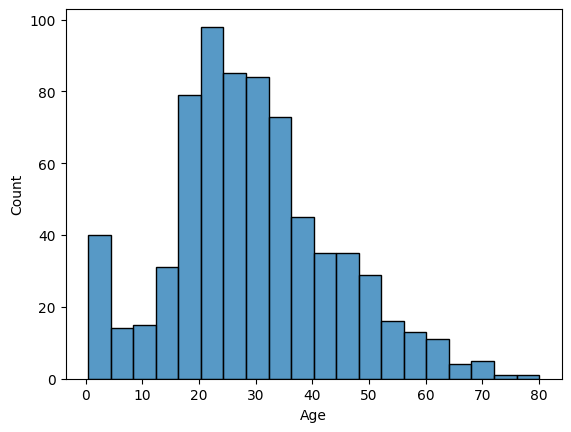

In [15]:
sns.histplot(df["Age"])
plt.show()

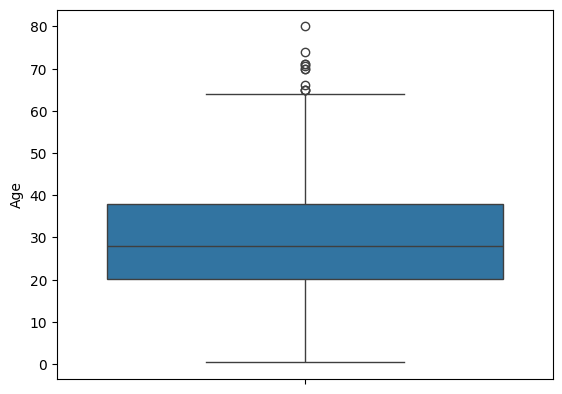

In [16]:
# Melihat distribusi Age dengan boxplot
sns.boxplot(df["Age"])
plt.show()

In [17]:
df[df["Age"] > 62].shape[0] # slicing berapa jumlah outlier

15

In [18]:
# cek outlier di 'Age'
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

age_outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]

In [19]:
age_outliers.shape[0]

11

In [20]:
age_outliers['Age'].min()

65.0

In [21]:
# boleh kalau mau cek dulu apakah ada kecenderungan perbedaan statistik Age berdasarkan Pclass
df.groupby(["Pclass"])["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [22]:
df.groupby(["Sex"])["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [23]:
df["AgeMedian"] = df["Age"].fillna(df["Age"].median()) # isi missing values di kolom Age dengan median

In [24]:
df["AgeMedianGroup"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median())) # isi missing values di kolom Age dengan median berdasarkan kelompok Pclass

In [25]:
df[["AgeMedian", "AgeMedianGroup", "Age"]].describe()

,AgeMedian,AgeMedianGroup,Age
count,891.000000,891.000000,714.000000
mean,29.361582,29.066409,29.699118
std,13.019697,13.244532,14.526497
min,0.420000,0.420000,0.420000
25%,22.000000,22.000000,20.125000
50%,28.000000,26.000000,28.000000
75%,35.000000,37.000000,38.000000
max,80.000000,80.000000,80.000000


In [26]:
# isi embarked dengan mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [27]:
# hapus kolom Cabin karena terlalu banyak null
df.drop(columns = ["Cabin"], inplace=True)
# df =  df.drop(columns=['Cabin']) # sama kayak yang di atas

Karena memang tidak ada yang duplikat, jadi nggak ada egek juga ketika drop_duplicates

### Handling Categorical Data

In [28]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [29]:
df["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


Kadang, categorical data ada yang berbeda values meski merujuk ke hal yang sama. Jadi, jika terjadi hal seperti itu, bisa melakukan standarisasi misalnya menyeragamkan tulisannya seperti upper atau lowercase

In [30]:
df['Sex'] = df['Sex'].str.lower().str.strip()
df['Embarked'] = df['Embarked'].str.upper().str.strip()

In [31]:
# encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SexEncoded'] = le.fit_transform(df['Sex'])


In [32]:
df[['Sex','SexEncoded']].value_counts()

,,count
Sex,SexEncoded,
male,1,577
female,0,314


In [33]:
# df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

### Handling Outliers

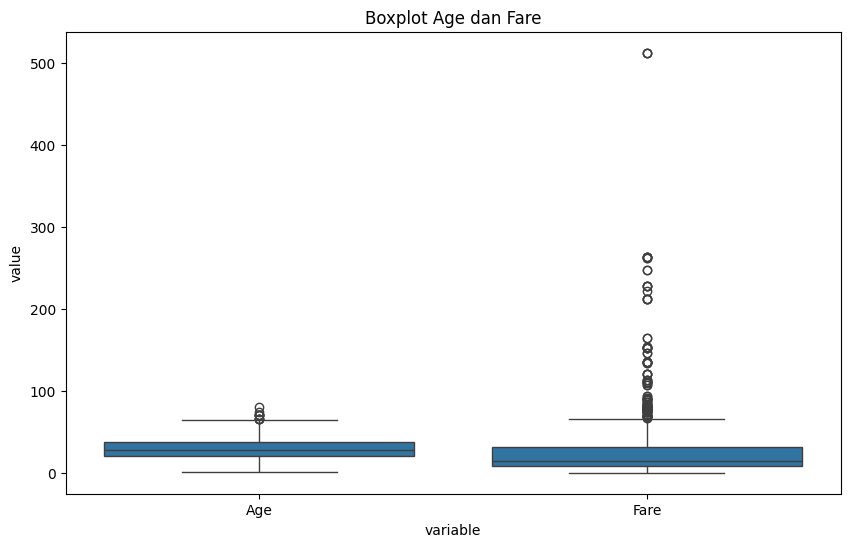

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='variable',
    y='value',
    data=pd.melt(df, id_vars=['Survived'], value_vars=['Age', 'Fare'])
    )
plt.title('Boxplot Age dan Fare')
plt.show()


In [35]:
# cek outlier di 'Fare'
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

fare_outliers = df[(df["Fare"] < lower_bound) | (df["Fare"] > upper_bound)]

In [36]:
fare_outliers.shape[0] / len(df) * 100

13.019079685746352

In [37]:
# kalau mau menghapus outliers

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

https://colab.research.google.com/drive/1y5M2M-svZVRpREFirjusdpmTtbCLpenc?usp=sharing
